# Titanic, some graphics and simple data analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Survival rate count

In [5]:
survival_rate = titanic['Survived'].value_counts()
#if survived value = 1

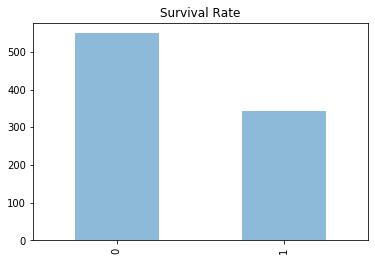

In [6]:
survival_rate.plot(kind="bar", title="Survival Rate", alpha=0.5)

In [7]:
survival_rate_norm = titanic['Survived'].value_counts(normalize=True)

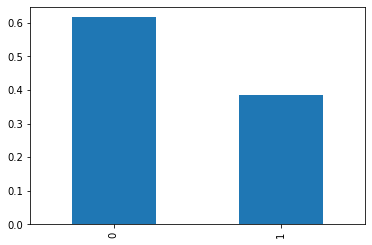

In [8]:
survival_rate_norm.plot(kind='bar')

The survival rate is about 60-40

# Age in regard to Survival rate

In [9]:
survived = titanic['Survived']
age = titanic['Age']

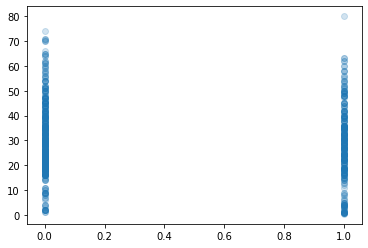

In [10]:

plt.scatter(survived, age, alpha=0.2)

# Classes with regard to Age

In [11]:
classes = titanic['Pclass'].value_counts(normalize=True)

In [12]:
classes

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

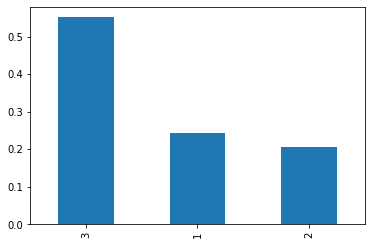

In [13]:
#part in every class
classes.plot(kind="bar")

How many persons in each class

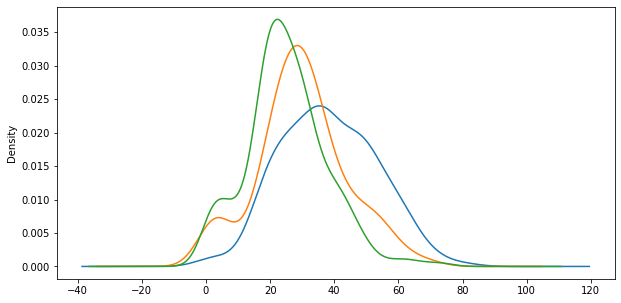

In [14]:
titanic[titanic['Pclass'] == 1]['Age'].plot(kind="kde", figsize=(10,5))
titanic[titanic['Pclass'] == 2]['Age'].plot(kind="kde", figsize=(10,5))
titanic[titanic['Pclass'] == 3]['Age'].plot(kind="kde", figsize=(10,5))

Text(0.5, 1.0, 'Classes with regard to Age')

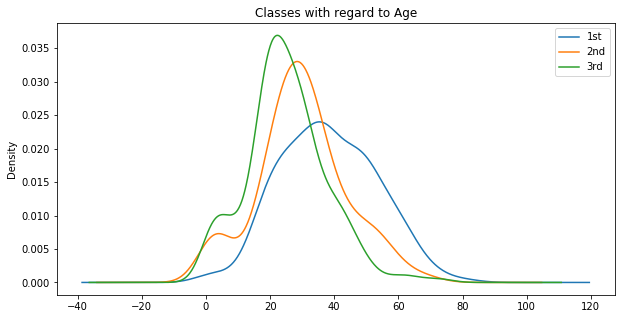

In [15]:
for i in [1,2,3]:
    titanic[titanic['Pclass'] == i]['Age'].plot(kind="kde", figsize=(10,5))

plt.legend(["1st", "2nd", "3rd"])
plt.title("Classes with regard to Age")

# Gender

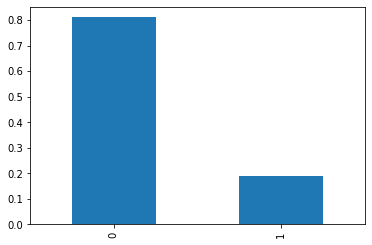

In [16]:
men = titanic[titanic['Sex'] == 'male']['Survived'].value_counts(normalize=True)
men.plot(kind="bar")

1 : survived male persons ( 0 : not) 

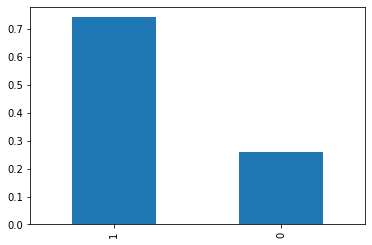

In [17]:
female = titanic[titanic['Sex'] == 'female']['Survived'].value_counts(normalize=True)
female.plot(kind="bar")

1 : survived female ( 0 : not survived)

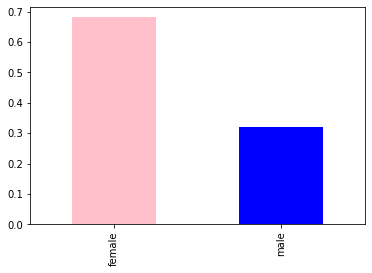

In [18]:
sex_survived = titanic[titanic['Survived'] == 1]["Sex"].value_counts(normalize=True)
sex_survived.plot(kind="bar", color=["pink", "b"])

male / female survived

In [19]:
all_men = titanic[titanic['Sex'] == 'male']
all_men_sur = all_men[all_men['Survived'] == 1]
rich_men_sur = all_men_sur[all_men_sur['Pclass'] == 1]
# Do it at home the rest

In [20]:
the_rich_men = titanic['Survived'][(titanic['Sex'] == "male") & (titanic['Pclass']==1)]

In [21]:
rich_men_data = the_rich_men.value_counts(normalize=True)
rich_men_data

0    0.631148
1    0.368852
Name: Survived, dtype: float64

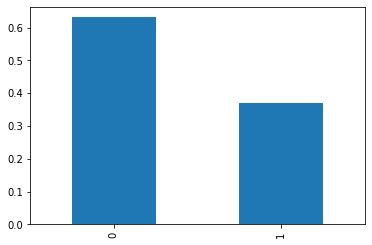

In [22]:
rich_men_data.plot(kind="bar")

not survived / survived reach men

In [23]:
the_poor_men = titanic['Survived'][(titanic['Sex'] == 'male') & (titanic['Pclass'] == 3)]
poor_men_data = the_poor_men.value_counts(normalize = 'True')
poor_men_data

0    0.864553
1    0.135447
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Poor men survival statistics')

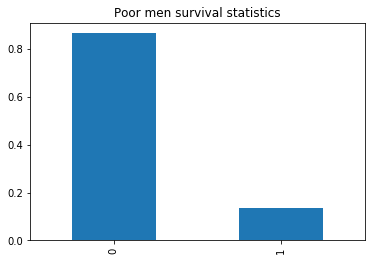

In [24]:
poor_men_data.plot(kind="bar")
plt.title("Poor men survival statistics")

not survived / survived poor men 

In [25]:
the_poor_women = titanic['Survived'][(titanic['Sex'] == 'female') & (titanic['Pclass'] == 3)]
poor_women_data = the_poor_women.value_counts(normalize = 'True')
poor_women_data

1    0.5
0    0.5
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Poor women survival statistics')

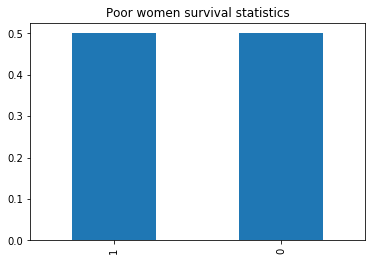

In [26]:
poor_women_data.plot(kind="bar")
plt.title("Poor women survival statistics")

survived / not survived poor woman

In [27]:
the_rich_women = titanic['Survived'][(titanic['Sex'] == 'female') & (titanic['Pclass'] == 1)]
rich_women_data = the_rich_women.value_counts(normalize = 'True')
rich_women_data

1    0.968085
0    0.031915
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Rich women survival statistics')

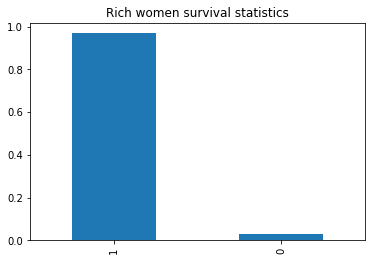

In [28]:
rich_women_data.plot(kind="bar")
plt.title("Rich women survival statistics")

survived / not survived rich woman

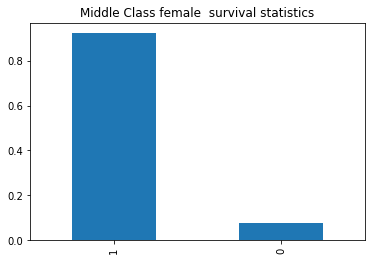

In [29]:
def surv(sex, p_class):
    if p_class == 1:
        word = "Rich"
    elif p_class == 3:
        word = "Poor"
    else:
        word = "Middle Class"
    the_person = titanic['Survived'][(titanic['Sex'] == sex) & (titanic['Pclass'] == p_class)]
    the_person_data = the_person.value_counts(normalize = 'True')
    the_person_data.plot(kind="bar")
    plt.title(f"{word} {sex}  survival statistics")
    
    

    
    
surv('female', 2)
    
    
    

In [30]:
#the function takes as argument "feature" and will draw plot bar of survival or not persons 
def plot_bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']== 0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = "bar", figsize = (10,5))
     
                     
    
    
    

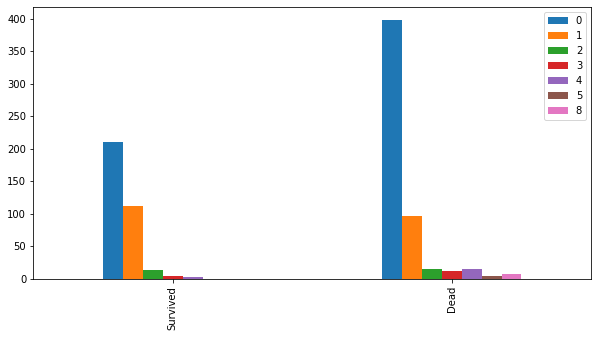

In [31]:
plot_bar_chart('SibSp')

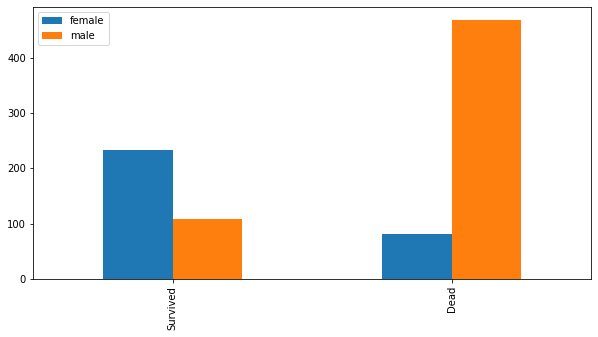

In [32]:
plot_bar_chart('Sex')

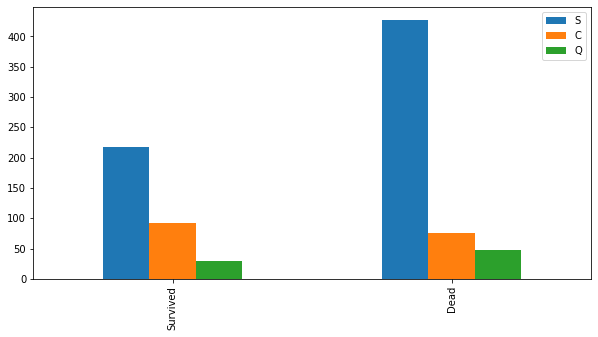

In [33]:
plot_bar_chart('Embarked')